[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0]
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0]
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0]
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]


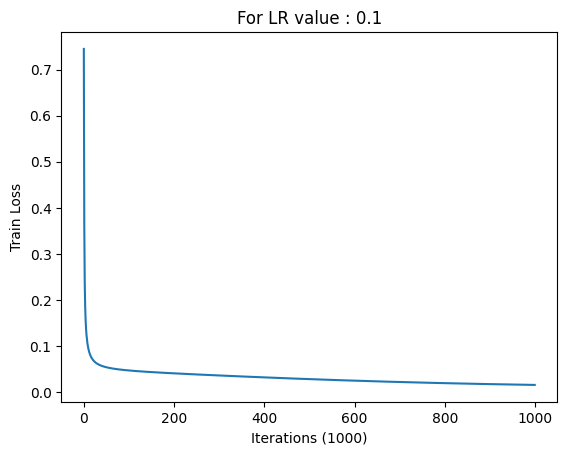

Accuracy for LR[0.1] : 52.17%
Accuracy for LR[0.1] : 52.17%


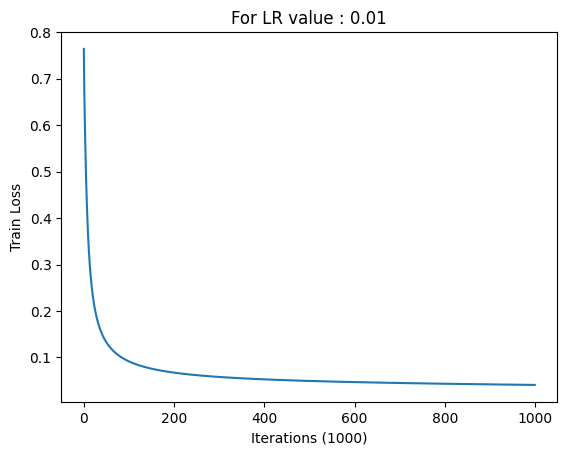

Accuracy for LR[0.01] : 52.17%
Accuracy for LR[0.01] : 52.17%


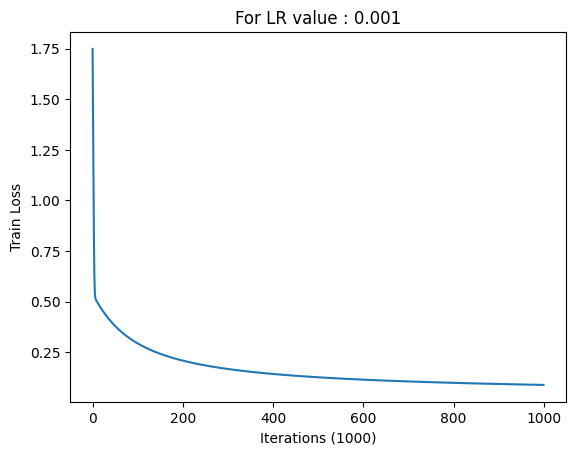

Accuracy for LR[0.001] : 52.17%
Accuracy for LR[0.001] : 52.17%


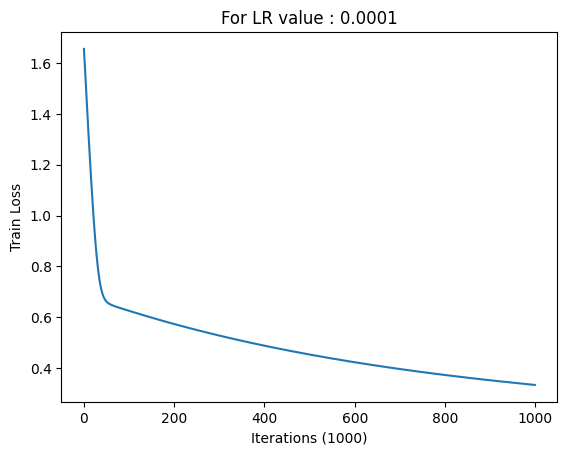

Accuracy for LR[0.0001] : 52.17%
Accuracy for LR[0.0001] : 52.17%


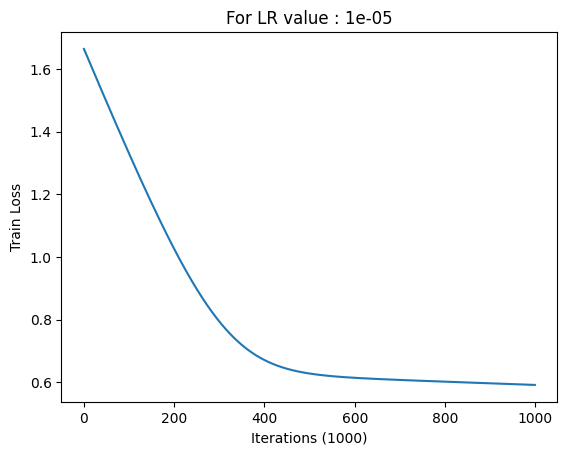

Accuracy for LR[1e-05] : 52.17%
Accuracy for LR[1e-05] : 52.17%


In [1]:


from numpy import genfromtxt
data_path = 'diabetes.csv'
my_data = genfromtxt(data_path, delimiter=',')

#my_data.shape
type(my_data)

data = my_data.tolist()
for i in range(5):
  print(data[i])
type(data)

# Dataset Loading
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# Data spliting
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)


learing_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for lr in learing_rate:
    theta = [np.random.rand(), np.random.rand(), np.random.rand()]
    train_loss = []

    for j in range(1000):
        TJ = 0
        for i in range(len(X_train)):
            X = np.insert(X_train[i], 0, 1)  # concating 1 at the begining

            Z = np.dot(X, theta)
            h = 1 / (1 + np.exp(-Z))
            J = -y_train[i] * np.log(h) - (1-y_train[i]) * np.log(1-h)
            TJ += J

            dv = X * (h - y_train[i])
            theta -= (dv * lr)

        TJ /= len(X_train)
        train_loss.append(TJ)

    # ploting
    plt.plot(train_loss)
    plt.xlabel('Iterations (1000)')
    plt.ylabel('Train Loss')
    plt.title(f'For LR value : {lr}')
    plt.show()


# Validation
    count = 0

    for v in range(len(X_val)):
        X = np.insert(X_val[v], 0, 1)  # concating 1
        Z = np.dot(X, theta)
        h = 1 / (1 + np.exp(-Z))

        h = 0 if h <= 0 else 1

        if h == y_val[v]:
            count += 1

    val_acc = count/len(X_val) * 100
    print(f'Accuracy for LR[{lr}] : {val_acc:.2f}%')

# for X_test
    count = 0

    for v in range(len(X_val)):
        X = np.insert(X_val[v], 0, 1)
        Z = np.dot(X, theta)
        h = 1 / (1 + np.exp(-Z))

        h = 0 if h <= 0 else 1

        if h == y_val[v]:
            count += 1

    val_acc = count/len(X_val) * 100
    print(f'Accuracy for LR[{lr}] : {val_acc:.2f}%')